In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/deepaksantosh/iot-jcomp/Dataset.csv


In [97]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [98]:
# Import dataset
dataset = pd.read_csv('/kaggle/input/d/deepaksantosh/iot-jcomp/Dataset.csv')

In [99]:
dataset.head()

,TEMPERATURE,HUMIDITY,HEAT INDEX,DEW TEMPERATURE,HEAT INDEX MESSAGE,PRECIPITATION PERCENTAGE,WEATHER
0,80,91,29.88,78.2,Caution,Chances of rain,Rainy
1,76,63,25.52,68.6,Normal,No rain,Fair & Clear and Humid
2,86,95,42.40,85.0,Danger,Chances of rain,Rainy
3,85,74,34.59,79.8,Extreme caution,No rain,Sunny and Humid
4,92,52,37.59,82.4,Extreme caution,No rain,Sunny and Humid


In [100]:
dataset.tail()

,TEMPERATURE,HUMIDITY,HEAT INDEX,DEW TEMPERATURE,HEAT INDEX MESSAGE,PRECIPITATION PERCENTAGE,WEATHER
995,89,17,29.55,72.4,Caution,No rain,Sunny and Moderately Humid
996,71,75,22.74,66.0,Normal,No rain,Fair & Clear and Humid
997,83,54,29.25,73.8,Caution,No rain,Sunny and Humid
998,72,30,24.59,58.0,Normal,No rain,Fair & Clear and Moderately Humid
999,94,83,56.00,90.6,Danger,Chances of rain,Rainy


In [101]:
dataset.shape

(1000, 7)

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TEMPERATURE               1000 non-null   int64  
 1   HUMIDITY                  1000 non-null   int64  
 2   HEAT INDEX                1000 non-null   float64
 3   DEW TEMPERATURE           1000 non-null   float64
 4   HEAT INDEX MESSAGE        1000 non-null   object 
 5   PRECIPITATION PERCENTAGE  1000 non-null   object 
 6   WEATHER                   1000 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [103]:
dataset.describe(include='number')

,TEMPERATURE,HUMIDITY,HEAT INDEX,DEW TEMPERATURE
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,83.249000,59.983000,33.007900,75.245600
std,7.968092,29.388338,11.247708,9.661763
min,70.000000,10.000000,14.060000,53.200000
25%,76.000000,34.000000,25.250000,68.000000
50%,83.000000,60.000000,29.650000,75.400000
75%,90.000000,87.000000,36.987500,82.400000
max,97.000000,109.000000,86.010000,98.400000


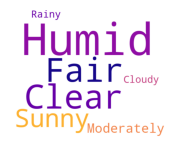

In [104]:
# Generating word cloud
text = ' '.join(dataset['WEATHER'].unique())
wordcloud = WordCloud(width=600, height=500, background_color='white', colormap='plasma').generate(text)
plt.figure(figsize=(2, 2), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [105]:
# Checking for missing values
if dataset.isnull().sum().sum() > 0:
    dataset.fillna(0, inplace=True)
else:
    print("No missing values")

No missing values


In [106]:
print("Weather Values:")
print(dataset['WEATHER'].unique())
print("Heat Index Message Values:")
print(dataset['HEAT INDEX MESSAGE'].unique())
print("Precipitation Pecentage Values:")
print(dataset['PRECIPITATION PERCENTAGE'].unique())

Weather Values:
['Rainy' 'Fair & Clear and Humid' 'Sunny and Humid'
 'Fair & Clear and Moderately Humid' 'Cloudy' 'Sunny and Moderately Humid']
Heat Index Message Values:
['Caution' 'Normal' 'Danger' 'Extreme caution']
Precipitation Pecentage Values:
['Chances of rain' 'No rain']


In [107]:
# Encoding values
weather_code = {'Rainy':0,'Fair & Clear and Humid':1,'Sunny and Humid':2,'Fair & Clear and Moderately Humid':3,'Cloudy':4,'Sunny and Moderately Humid':5}
heatindex_code = {'Caution':0,'Normal':1,'Danger':2,'Extreme caution':3}
pp_code = {'Chances of rain':1,'No rain':0}
dataset['WEATHER'] = dataset['WEATHER'].map(weather_code)
dataset['HEAT INDEX MESSAGE'] = dataset['HEAT INDEX MESSAGE'].map(heatindex_code)
dataset['PRECIPITATION PERCENTAGE'] = dataset['PRECIPITATION PERCENTAGE'].map(pp_code)

In [108]:
dataset.head()

,TEMPERATURE,HUMIDITY,HEAT INDEX,DEW TEMPERATURE,HEAT INDEX MESSAGE,PRECIPITATION PERCENTAGE,WEATHER
0,80,91,29.88,78.2,0,1,0
1,76,63,25.52,68.6,1,0,1
2,86,95,42.40,85.0,2,1,0
3,85,74,34.59,79.8,3,0,2
4,92,52,37.59,82.4,3,0,2


In [109]:
# Setting the target feature and Splitting the data
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [110]:
# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
# SVM MODEL
from sklearn import svm
from sklearn.metrics import accuracy_score
svm_model = svm.SVC(kernel='poly')
# Train the model using training data
svm_model.fit(X_train,y_train)
# Use the model to predict the labels for the test data
y_pred = svm_model.predict(X_test)
# Calculate the acccuracy of the model
accuracy = accuracy_score(y_test,y_pred)
# Print the accuracy of the model
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 98.50%


In [112]:
# Finding the number of class in target feature(categorical value)
num_classes = len(set(y_train))
print(num_classes)

2


In [113]:
# ANN MODEL
# Create the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [114]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [115]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 0.6432 - accuracy: 0.7000 - val_loss: 0.5439 - val_accuracy: 0.8200
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4710 - accuracy: 0.8338 - val_loss: 0.4036 - val_accuracy: 0.8500
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.8950 - val_loss: 0.3084 - val_accuracy: 0.9300
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2698 - accuracy: 0.9475 - val_loss: 0.2389 - val_accuracy: 0.9550
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2079 - accuracy: 0.9762 - val_loss: 0.1871 - val_accuracy: 0.9650
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1595 - accuracy: 0.9812 - val_loss: 0.1502 - val_accuracy: 0.9600
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1261 - accuracy: 0.9812 - val_loss: 0.1234 - val_accuracy: 0.9700
Epoch 8/10
13/13 [=

In [116]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

7/7 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.9750
Accuracy: 97.50%


In [117]:
new_input = [[80,91,29.88,78.2,'Caution']]
column = ['TEMPERATURE','HUMIDITY','HEAT INDEX','DEW TEMPERATURE','HEAT INDEX MESSAGE']
weather_code = {'Rainy':0,'Fair & Clear and Humid':1,'Sunny and Humid':2,'Fair & Clear and Moderately Humid':3,'Cloudy':4,'Sunny and Moderately Humid':5}
heatindex_code = {'Caution':0,'Normal':1,'Danger':2,'Extreme caution':3}
pp_code = {'Chances of rain':1,'No rain':0}
df = pd.DataFrame(new_input,columns =column )
df['HEAT INDEX MESSAGE'] = df['HEAT INDEX MESSAGE'].map(heatindex_code)
prediction = model.predict(df)
prediction = np.ceil(prediction)
weather_decode = {v: k for k, v in weather_code.items()}
pp_decode = {v: k for k, v in pp_code.items()}
prediction_decoded =[]
for pred in prediction:
    pred1 = weather_decode[pred[0]]
    pred2 = pp_decode[pred[1]]
    prediction_decoded.append((pred1, pred2))
print("Precipitation Message:"+pred2+"\n"+"Weather:"+pred1)


1/1 [==============================] - 0s 74ms/step
Precipitation Message:Chances of rain
Weather:Rainy


7/7 [==============================] - 0s 2ms/step
Confusion Matrix:
[[134   4]
 [  1  61]]
Recall: [0.97101449 0.98387097]
Precision: [0.99259259 0.93846154]
AUC: 0.9774427302477793


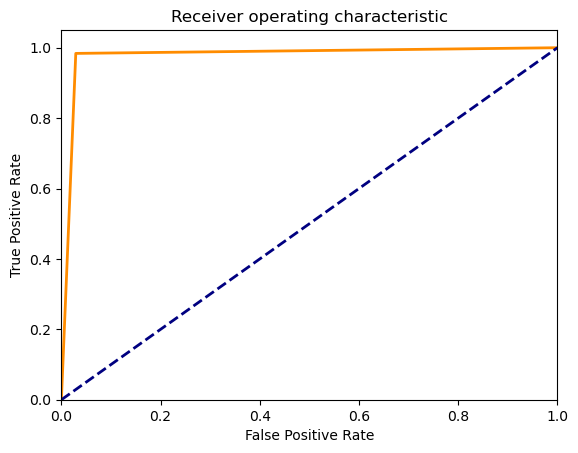

In [118]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predict the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate recall and precision
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)


# Print recall and precision
print("Recall:", recall)
print("Precision:", precision)

# Calculate FPR and TPR for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
